In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
import networkx as nx

#### Данные:

* Neutral Network

In [2]:
NN = nx.read_edgelist('ca-netscience.txt')
print(nx.degree_assortativity_coefficient(NN))

-0.08167784834672846


* Assortative Network

In [3]:
AS = nx.read_edgelist('proteins.txt') 
print(nx.degree_assortativity_coefficient(AS))

0.39677721250363557


* Disassortative Network

In [4]:
DS = nx.read_edgelist('bio-yeast.txt') 
print(nx.degree_assortativity_coefficient(DS))

-0.20954054116464868


#### 1. Матрица корреляций степеней вершин (3 балла)
* напишите функцию, вычисляющую матрицу корреляции степеней $e_{ij}$;
* напишите функцию, вычисляющую коэффициент ассортативности по матрице корреляций $e_{ij}$:
$$
r=\sum_{jk}\frac{jk\left[e_{jk}-q_jq_k\right]}{\sigma_q^2},
$$
$$
\sigma_q^2=\sum_k k^2q_k-(\sum_k kq_k)^2,
$$
$$
q_j=\sum_{i} e_{ji},
$$

* для заданных сетей постройте матрицы корреляций и вычислите коэффициент ассортативности, сравните со значениями, вычисленными с помощью [функции](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.assortativity.degree_assortativity_coefficient.html#networkx.algorithms.assortativity.degree_assortativity_coefficient).

In [41]:
import collections, numpy
def er(G):
    degrees = dict(G.degree)
    m = max(list(degrees.values()))
    e = np.zeros((m + 1,  m + 1))
    for i in G.edges():
        e[degrees[i[0]], degrees[i[1]]] += 1
        e[degrees[i[1]], degrees[i[0]]] += 1
    e /= np.sum(e)
    q = []
    for i in range(len(e)):
        q.append(np.sum(e[i]))
    s = 0
    for i in range(len(e)):
        s += i * i * q[i]
    s2 = 0
    for i in range(len(e)):
        s2 += i * q[i]
    s2 *= s2
    s -= s2
    r = 0
    for j in range(len(e)):
        for k in range(len(e)):
            r += j * k * (e[j][k] - q[j] * q[k])
    r /= s
    return e, r

In [42]:
_, r = er(NN)
print(r, nx.degree_assortativity_coefficient(NN))

-0.08167784834672827 -0.08167784834672846


In [43]:
_, r = er(AS)
print(r, nx.degree_assortativity_coefficient(AS))

0.39677721250363623 0.39677721250363557


In [44]:
_, r = er(DS)
print(r, nx.degree_assortativity_coefficient(DS))

-0.20954054116464868 -0.20954054116464868


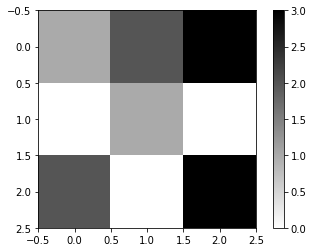

In [0]:
plt.imshow([[1,2,3],[0,1,0],[2,0,3]],cmap='binary') # для визуализации матрицы корреляций
plt.colorbar()

#### 2. Функция корреляции степеней (3 балла)
* напишите функцию, вычисляющую функцию корреляции $k_{nn}(k)$ для сети:
$$
k_{nn}(k)=\sum_{k'}k'P(k'|k)=\frac{\sum_i{k_{nn,i}}}{N(k)};
$$
$N(k)$ - число вершин степени $k$.
* постройте функции корреляций $k_{nn}(k)$ для заданных сетей. Аппроксимируйте в двойном логарифмическом масштабе полученные зависимости прямой:
$$
\log(k_{nn}(k))=\log(a)+\mu \log k
$$
Чему равны значения $\mu$ для разных сетей? 

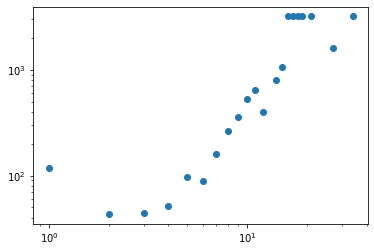

In [73]:
def corr(G):
    knni = nx.average_neighbor_degree(G)
    s = np.sum(list(knni.values()))
    degrees = dict(G.degree())
    degrees = dict(collections.Counter(sorted(degrees.values())))
    knn = np.zeros(len(degrees.keys()))
    keys = list(degrees.keys())
    for i in range(len(knn)):
        k = degrees[keys[i]]
        knn[i] = s / k
    return np.array(list(map(int, degrees.keys()))), np.array(knn)
        
x, y = corr(NN)
plt.scatter(x, y)
plt.yscale("log")
plt.xscale("log")
plt.show()

In [64]:
np.polyfit(x, y, 1) #для аппроксимации

array([ 126.43933698, -349.19368597])

#### 3. Алгоритм [Xalvi-Brunet & Sokolov](https://en.wikipedia.org/wiki/Xulvi-Brunet%E2%80%93Sokolov_algorithm) (4 балла)
* измените функцию рандомизации сети (предыдущий семинар) так, чтобы рандомизированная сеть была ассортативна/диссортативна ($\rho=1$);

На каждом шаге из вершин $(P,Q), (R,S)$ соединяйте вершины наибольших степеней (ассортативность) или вершину наибольшей степени с вершиной наименьшей степени (диссортативность). Второе ребро соединяет оставшиеся вершины выбранной четверки. 
* проверьте, что алгоритм строит ассортативную/диссортативную сеть на случайных/реальных сетях. 

Исследуйте как влияет ассортативность сети на порог перколяции в случайных графах Эрдеша-Реньи:
* для разных значений $p \in\left[10^{-4},5  \centerdot 10^{-3} \right]$ сгенерируйте ансамбль случайных сетей $G(N,p)$, $N=10^3$, число сетей в ансамбле 10;
* постройте зависимость среднего значения гигантской компоненты в ансамбле как функцию $p$ (см. NS Seminar 03).
* с помощью вашего алгоритма сделайте сети ансамбля ассортативными/диссортативными;
* постройте зависимость среднего значения гигантской компоненты в ансамбле как функцию $p$ для смоделированных сетей (три зависимости на одном графике);

Как изменился порог перколяции? 